In [223]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from PIL import Image
import os.path
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import load_model
import sklearn.model_selection
import cv2

This project uses "Face Mask Detection Dataset" downloaded from Kaggle at


https://www.kaggle.com/datasets/omkargurav/face-mask-dataset

# Let us first take a look at our image datasets #1

Starting with the dataset that contains people who wear a mask

In [224]:
def PeekDataSet(path_pre, path_suf, title):
    plt.figure(figsize = (12,10))
    plt.suptitle(title, fontsize = 30)
    for i in range(1,13):
        path = path_pre + str(i) + path_suf
        if os.path.exists(path):
            img = plt.imread(path)    
            plt.subplot(3,4,i)
            plt.imshow(img)
        else:
            print(path, 'not found')

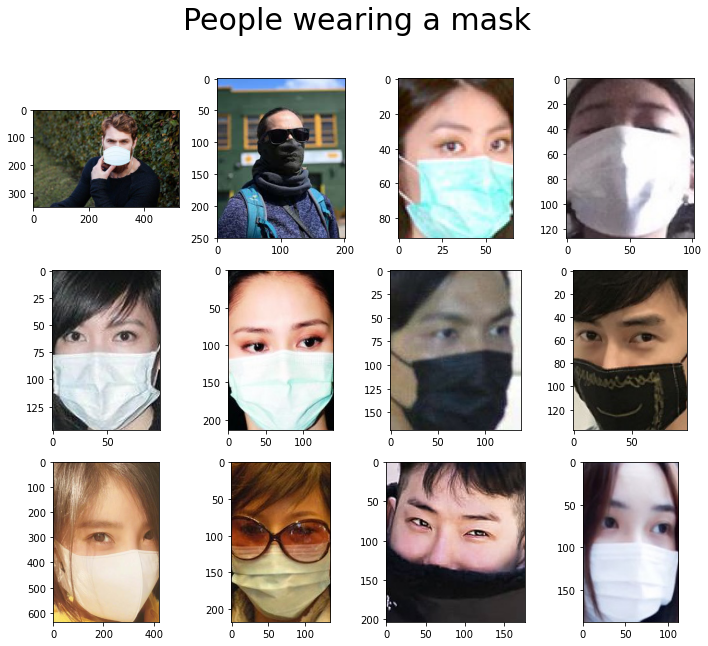

In [225]:
path_pre = 'images/with_mask/with_mask_'
path_suf = '.jpg'
title = 'People wearing a mask'

PeekDataSet(path_pre, path_suf, title)

# Let us first take a look at our image datasets #2
These are the datasets that contain of people who don't wear a mask

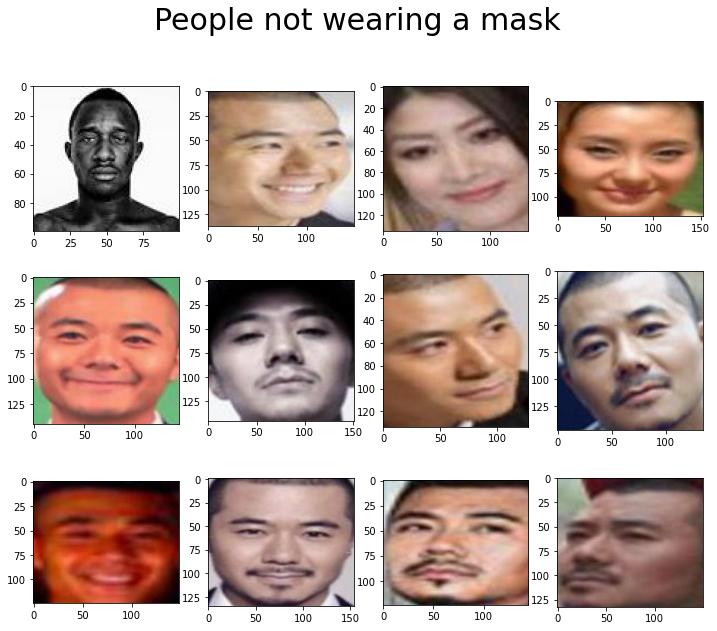

In [226]:
path_pre = 'images/without_mask/without_mask_'
path_suf = '.jpg'
title = 'People not wearing a mask'

PeekDataSet(path_pre, path_suf, title)

# Notice that...

The images do not have the same sizes, but they are all the same image types: jpg

Therefore, we must convert all images into the same sizes 

# # Let us make every picutre's dimension: 96,96,3
96x96 takes less time to train, and it does not shrink image to the point that it destroys it

In [227]:
x_list_mask = []
y_list_mask = []
for i in range(1,3726):
    path = 'images/with_mask/with_mask_' + str(i) + '.jpg'
    image = cv2.imread(path)
    image = cv2.resize(image, (96,96))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #store the image into an array and store the value to another array: 0 = wearing a mask
    x_list_mask.append(image)
    y_list_mask.append(0)

They now all have the same size 96x96

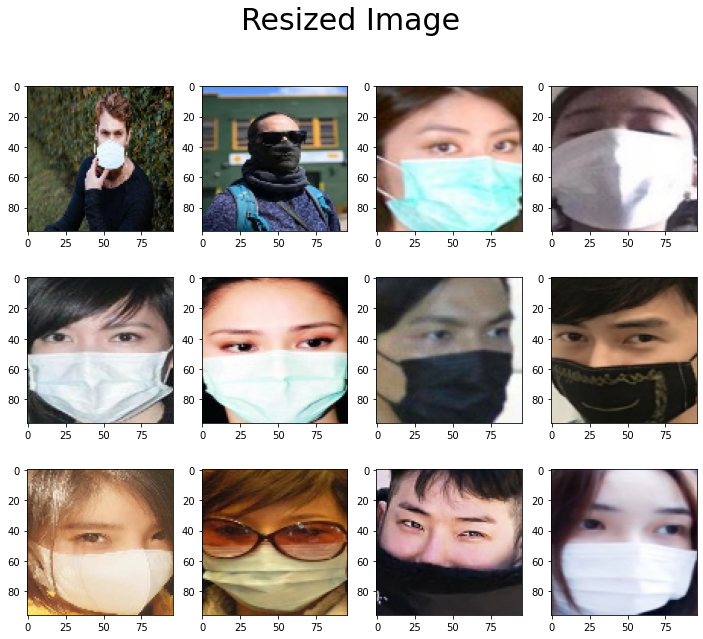

In [228]:
def displayResizedImage(x_list):
    plt.figure(figsize = (12,10))
    plt.suptitle('Resized Image', fontsize= 30)

    for i in range(0, 12):
        plt.subplot(3,4,i+1)
        plt.imshow(x_list[i])
        
displayResizedImage(x_list_mask)

# Now onto data without mask

In [229]:
x_list_no_mask = []
y_list_no_mask = []
for i in range(1,3829):
    path = 'images/without_mask/without_mask_' + str(i) + '.jpg'
    image = cv2.imread(path)
    image = cv2.resize(image, (96,96))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    x_list_no_mask.append(image)
    y_list_no_mask.append(1)

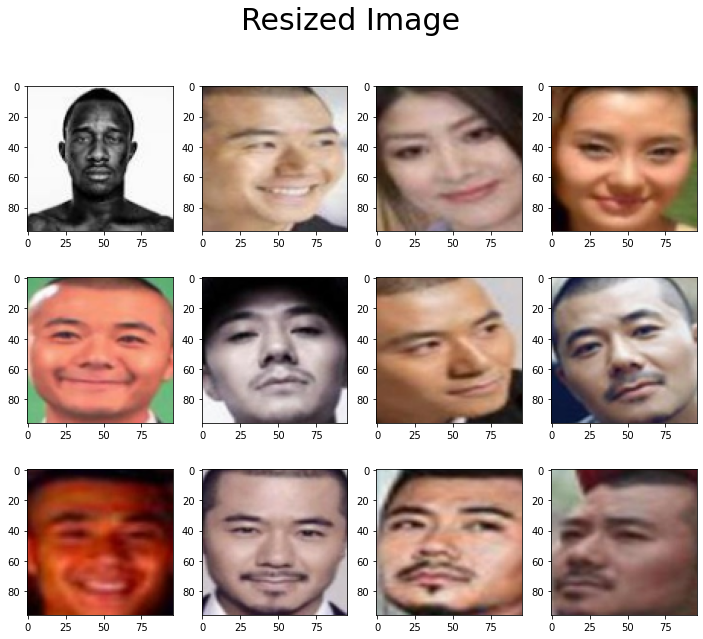

In [230]:
displayResizedImage(x_list_no_mask)

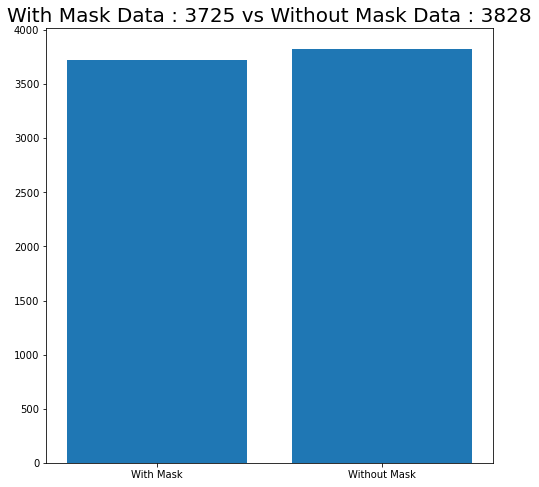

In [231]:
plt.figure(figsize=(8,8))
plt.bar([0,1],[len(y_list_mask),len(y_list_no_mask)])
labels = ['With Mask', 'Without Mask']
plt.xticks([0,1], labels, rotation ='horizontal')
plt.title('With Mask Data : '+ str(len(y_list_mask)) + ' vs Without Mask Data : ' + str(len(y_list_no_mask)), fontsize = 20)
plt.show() 

# Let us put all the X and y together

In [232]:
X_list = []
y_list = []
X_list.extend(x_list_mask)
X_list.extend(x_list_no_mask)
y_list.extend(y_list_mask)
y_list.extend(y_list_no_mask)

Convert the array into numpy

In [233]:
X = np.array(X_list)
y = np.array(y_list) 
print(X.shape)
print(y.shape)

(7553, 96, 96, 3)
(7553,)


# Let us now split the X and y into training set and testing set

training consists of 80% of data

testing consists of 20% of data

In [234]:
X_trn, X_tst, y_trn, y_tst = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [235]:
y_trn = y_trn.ravel()
y_tst = y_tst.ravel()
print('X_trn has shape:', X_trn.shape)
print('y_trn has shape: ', y_trn.shape)
print('X_tst has shape:', X_tst.shape)
print('y_tst has shape:', y_tst.shape)

X_trn has shape: (6042, 96, 96, 3)
y_trn has shape:  (6042,)
X_tst has shape: (1511, 96, 96, 3)
y_tst has shape: (1511,)


In [236]:
trn_with_mask_counter = 0
trn_without_mask_counter = 0
tst_with_mask_counter = 0
tst_without_mask_counter = 0

for i in y_trn:
    if i == 0:
        trn_with_mask_counter += 1
    elif i == 1:
        trn_without_mask_counter += 1

for i in y_tst:
    if i == 0:
        tst_with_mask_counter += 1
    elif i == 1:
        tst_without_mask_counter += 1
        

print('In Training set, there are ' , trn_with_mask_counter , ' datasets of people WITH Mask')
print('In Training set, there are ' , trn_without_mask_counter , ' datasets of people WITHOUT Mask')
print('In Testing set, there are ' , tst_with_mask_counter , ' datasets of people WITH Mask')
print('In Testing set, there are ' , tst_without_mask_counter , ' datasets of people WITHOUT Mask')

        

In Training set, there are  2976  datasets of people WITH Mask
In Training set, there are  3066  datasets of people WITHOUT Mask
In Testing set, there are  749  datasets of people WITH Mask
In Testing set, there are  762  datasets of people WITHOUT Mask


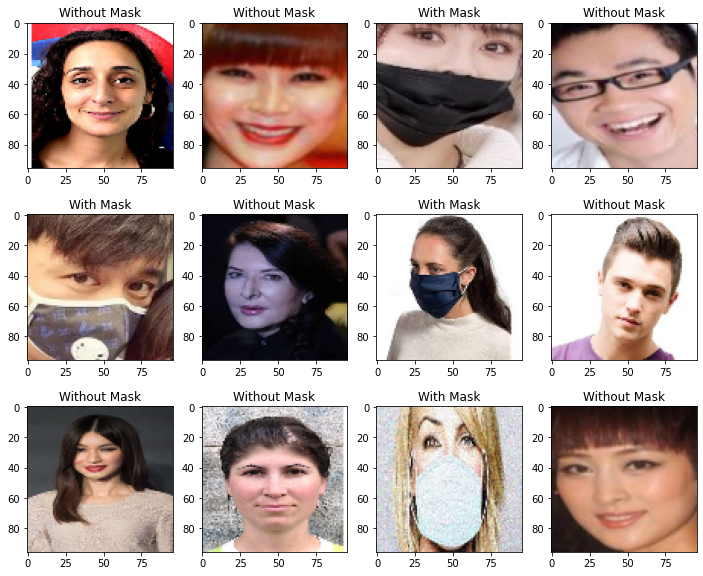

In [237]:
classes = {0:'With Mask', 1:'Without Mask'}

def plot_Image(X,y,index):
    plt.imshow(X[index])
    plt.title(classes[y[index]])

# Let's try to print the first 5 indexes in the training set
plt.figure(figsize = (12,10))
for i in range(0, 12):
    plt.subplot(3,4,i+1)
    plot_Image(X_trn,y_trn,i)
    

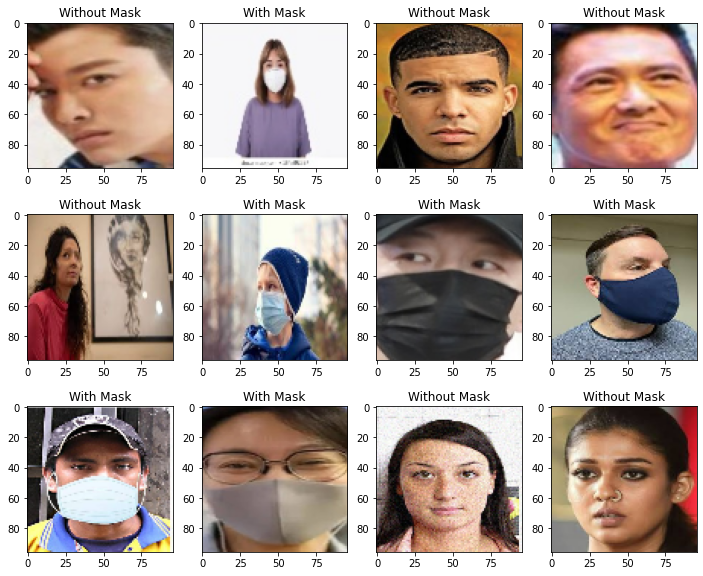

In [238]:
# Let's try to print the first 5 indexes in the testing set
plt.figure(figsize = (12,10))
for i in range(0, 12):
    plt.subplot(3,4,i+1)
    plot_Image(X_tst,y_tst,i)

# Normalize the image data by dividing 255

In [239]:
X_trn = X_trn / 255
X_tst = X_tst / 255

# Let us now initialize our first CNN model

In [240]:
%%time
# initialize the layers of neural network
cnn2 = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size = (3,3) , activation='relu', input_shape=(96,96,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size = (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(2, activation = 'softmax')
])

cnn2.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy']
           )


history  = cnn2.fit(X_trn,y_trn,epochs=10)

Epoch 1/10
189/189 [==============================] - 57s 301ms/step - loss: 0.3269 - accuracy: 0.8676
Epoch 2/10
189/189 [==============================] - 58s 306ms/step - loss: 0.2099 - accuracy: 0.9197
Epoch 3/10
189/189 [==============================] - 57s 303ms/step - loss: 0.1686 - accuracy: 0.9358
Epoch 4/10
189/189 [==============================] - 57s 303ms/step - loss: 0.1200 - accuracy: 0.9563
Epoch 5/10
189/189 [==============================] - 58s 307ms/step - loss: 0.0761 - accuracy: 0.9747
Epoch 6/10
189/189 [==============================] - 58s 307ms/step - loss: 0.0498 - accuracy: 0.9831
Epoch 7/10
189/189 [==============================] - 59s 313ms/step - loss: 0.0363 - accuracy: 0.9868
Epoch 8/10
189/189 [==============================] - 61s 320ms/step - loss: 0.0290 - accuracy: 0.9904
Epoch 9/10
189/189 [==============================] - 60s 319ms/step - loss: 0.0154 - accuracy: 0.9955
Epoch 10/10
189/189 [==============================] - 59s 314ms/step - l

# We have an accuracy of 93.71%! 

In [249]:
loss, accuracy = cnn2.evaluate(X_tst, y_tst, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

48/48 [==============================] - 2s 35ms/step - loss: 0.2724 - accuracy: 0.9371
Test: accuracy = 0.937128  ;  loss = 0.272449


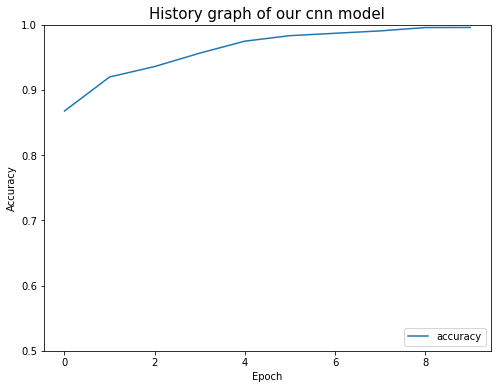

In [251]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title('History graph of our cnn model', fontsize= 15)
plt.legend(loc='lower right');

# Saving the model as a h5 file to reuse in the future without training it again

In [243]:
# save the trained cnn model with 80% accuracy
if os.path.isfile('mask_detector.h5') is False:
    cnn2.save('mask_detector.h5')

# we can now load it by calling load_model as written below--

In [248]:
new_model = load_model('mask_detector.h5')
new_model.evaluate(X_tst,y_tst)

48/48 [==============================] - 2s 34ms/step - loss: 0.2724 - accuracy: 0.9371


[0.2724493741989136, 0.9371277093887329]

# Display some good results

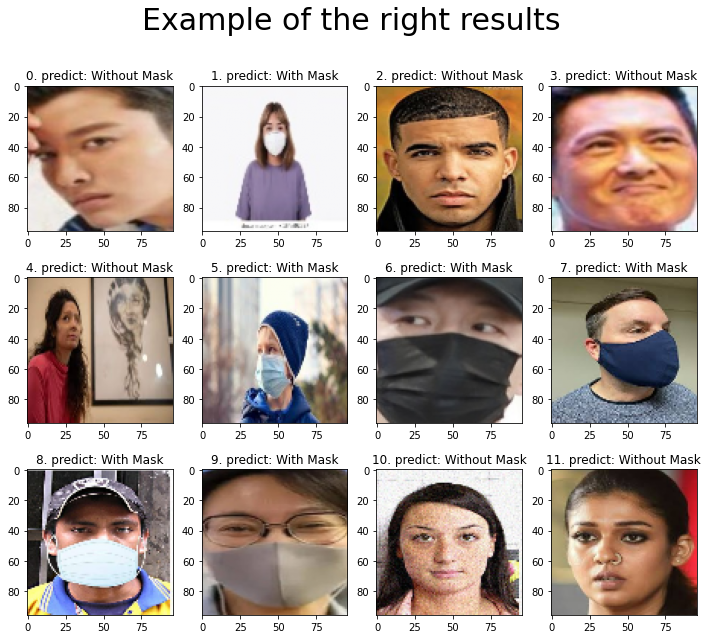

In [252]:
y_preds = new_model.predict(X_tst)
y_result = [np.argmax(element) for element in y_preds]
plt.figure(figsize = (12,10))
plt.suptitle('Example of the right results', fontsize = 30)
for i in range(0,12):
    if y_result[i] == y_tst[i]:
        plt.subplot(3,4,i+1)
        plt.imshow(X_tst[i])
        plt.title(str(i)+ '. predict: ' + classes[y_result[i]])

# Let's display some false results

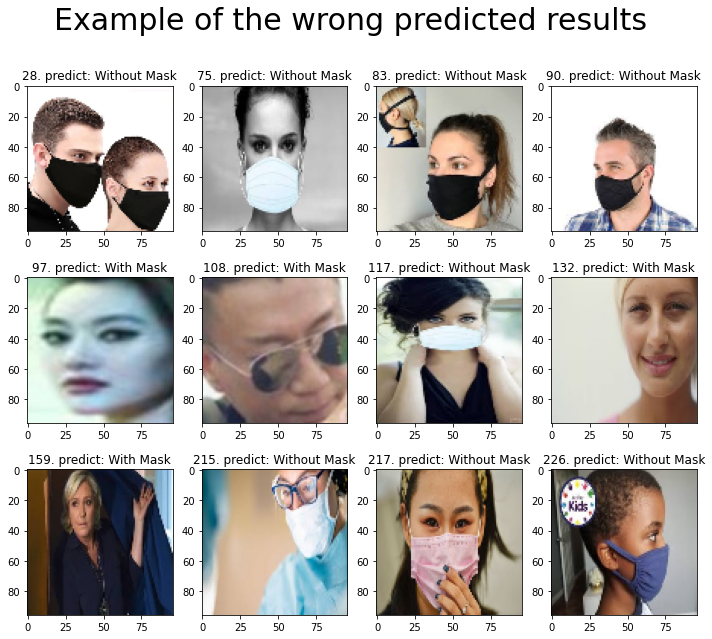

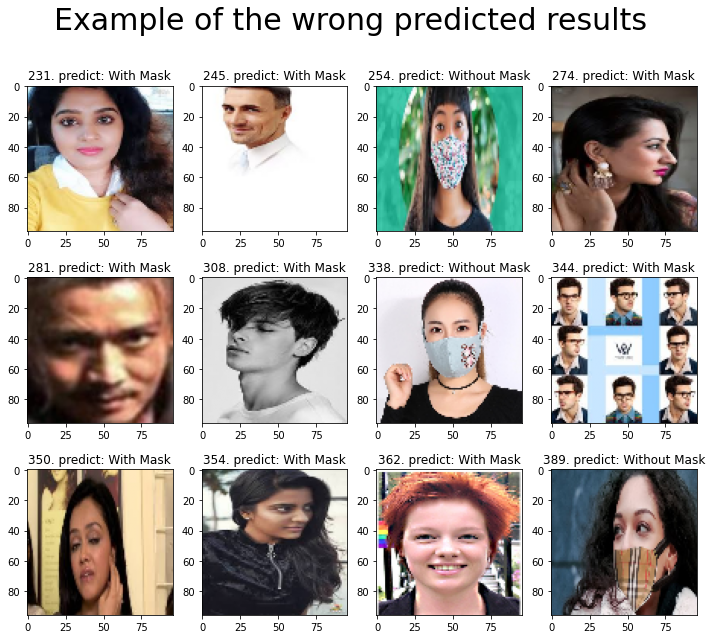

In [253]:
def getWrongResults(starting_index):
    imageDisplayCounter = 0
    plt.figure(figsize = (12,10))
    plt.suptitle('Example of the wrong predicted results', fontsize = 30)
    for i in range(starting_index,len(y_result)):
        if y_result[i] != y_tst[i]:
            if imageDisplayCounter < 12:
                plt.subplot(3,4,imageDisplayCounter+1)
                plt.imshow(X_tst[i])
                plt.title(str(i) + '. predict: ' + classes[y_result[i]])
                imageDisplayCounter += 1
            else:
                return


getWrongResults(0)
getWrongResults(227)

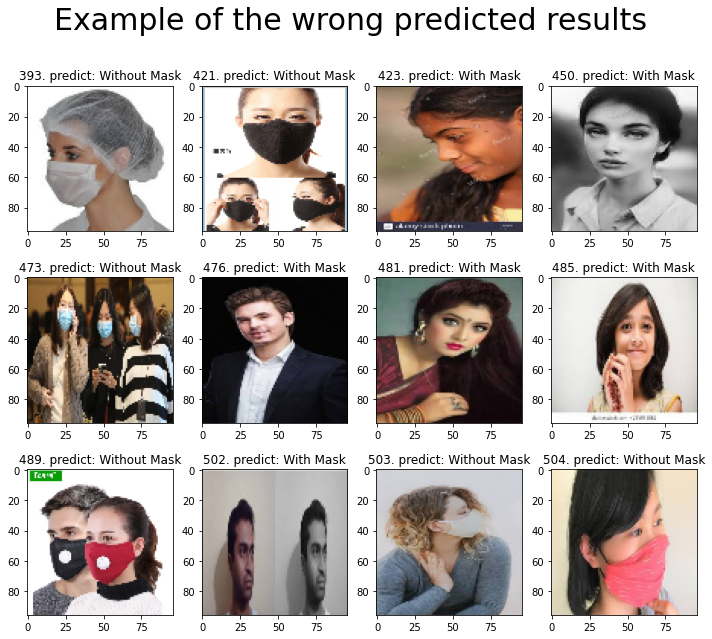

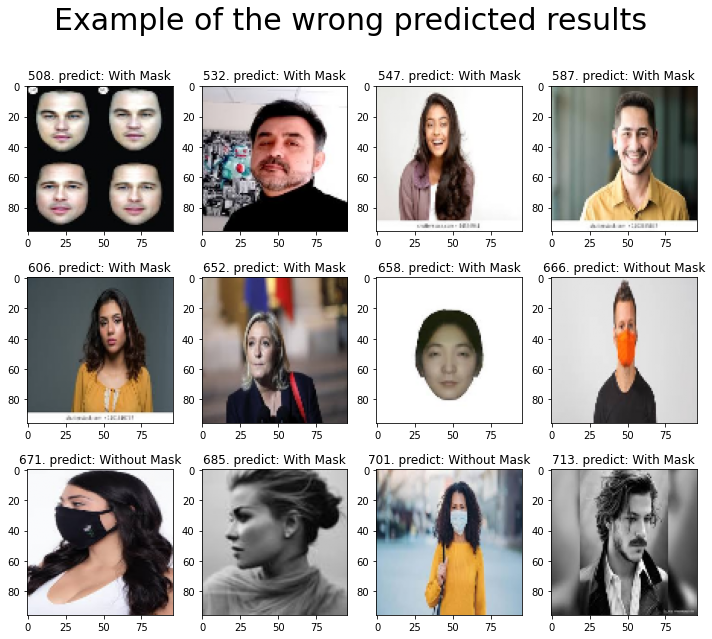

In [254]:
getWrongResults(390)
getWrongResults(505)

# We have only used the testing set from the dataset to test our accuracy

so now let us test it with some random pictures I have found on google image

-- let us take a look at the pictures I will be using

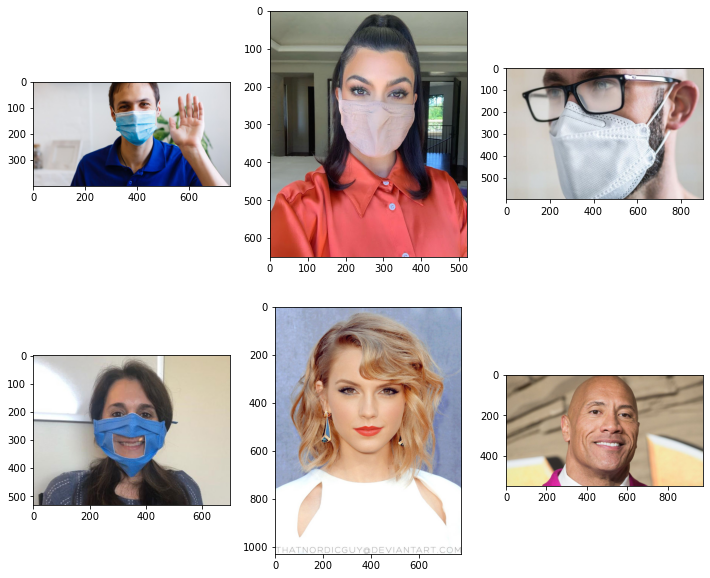

In [255]:
x_test_list = []
plt.figure(figsize = (12,10))
for i in range(1,7):
    path = 'images/moreTests/test' + str(i) + '.png'
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(2,3,i)
    plt.imshow(image)
    image = cv2.resize(image, (96,96))
    x_test_list.append(image)

# Now let's see whether we have the right result

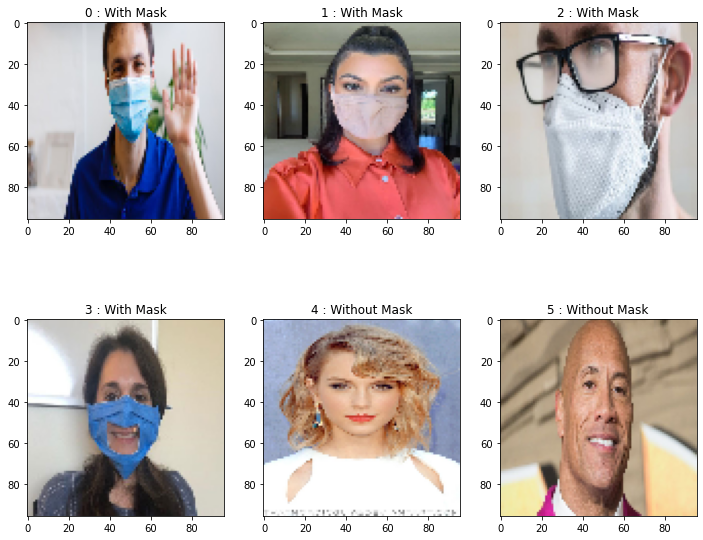

In [256]:
x_test_list = np.array(x_test_list)
y_preds = new_model.predict(x_test_list)
y_result = [np.argmax(element) for element in y_preds]
plt.figure(figsize = (12,10))

for i in range(0,len(y_result)):
    plt.subplot(2,3,i+1)
    plt.imshow(x_test_list[i])
    plt.title(str(i) + ' : ' + classes[y_result[i]])

# comments on the result:

All external images have the right result. Even with image 3, the model predicts it as "with mask" even though her mouth is showing

         Confusion Matrix of Mask Detector Model


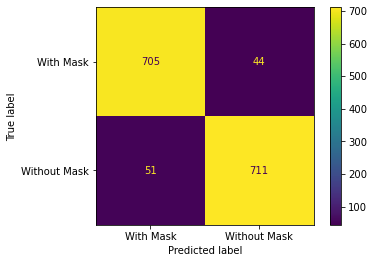

In [284]:
from sklearn.metrics import confusion_matrix
def plotConfusionMatrix(model, X_tst,y_tst, labels):
    y_ = model.predict(X_tst)
    y_pred = [np.argmax(element) for element in y_]
    confusion_matrix(y_tst, y_pred, labels=labels)
    mtr = sklearn.metrics.confusion_matrix(y_tst, y_result, labels=[0,1])
    disp = sklearn.metrics.ConfusionMatrixDisplay(mtr, display_labels= [classes[labels[0]],classes[labels[1]]])
    disp.plot(xticks_rotation='horizontal');

print('         Confusion Matrix of Mask Detector Model')
plotConfusionMatrix(new_model, X_tst, y_tst, [0, 1])

# We can now move on to predict in real time

In [77]:
def predit(model, imagePath):
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (96,96))
    y_preds = model.predict(np.array([image])/255)
    y_result = [np.argmax(element) for element in y_preds]
    #print(classes[y_result[0]])
    return classes[y_result[0]]


# Using opencv's videoCapture, we can test the image saved in each frame in real time with our webcam 
# Please visit the following link to view a demo
# https://drive.google.com/file/d/1HX-g5iiI0GWMhtOW5PTsvPw61HbF528A/view 

press q to quit

In [78]:
cap = cv2.VideoCapture(0)
label = ''
while True:
    ret, frame = cap.read()
    font = cv2.FONT_HERSHEY_SIMPLEX
    frame_copy = cv2.putText(frame.copy(),label,(50,50),font,2,5) 
    cv2.imshow('frame',frame_copy)    
    imagename = os.path.join('images/real-time', 'liveTaken.jpg')
    cv2.imwrite(imagename, frame)
    label = predit(new_model,imagename)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()



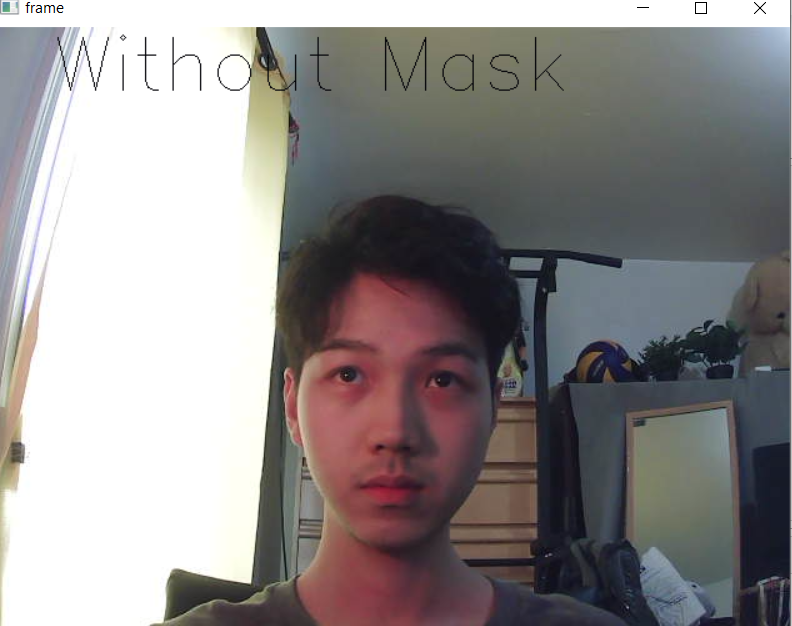

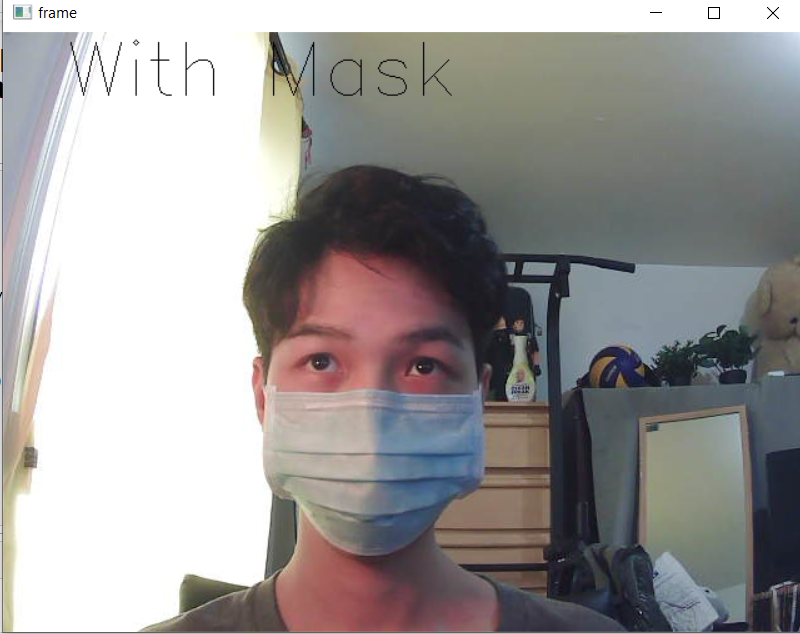

# Final comments
The detection mainly works the best with a background that has uniform color and the person's face located in the middle of the screen. It does not work very well when the overall brightness is dark because it is hard to detect the human's face as it blends in the background